# Air pollutants and happiness
Is there any correlation between the concentration of air pollutants and happiness?

In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr


In [2]:
# Read in the happiness csv files 
happiness_2015_df = pd.read_csv('../resources/Happiness_data_clean_2015.csv')
happiness_2016_df = pd.read_csv('../resources/Happiness_data_clean_2016.csv')
# happiness_2017_df = pd.read_csv('../resources/2017_happiness_data.csv')
# happiness_2017_df

In [3]:
# Pull the Happiness Scores from 2015 and 2016 and merge together
happiness_score_2015_df = happiness_2015_df[['Country', '2015_score']]
happiness_scores_df = happiness_score_2015_df.merge(happiness_2016_df[['Country', '2016_score']], on = 'Country')
# happiness_scores = happiness_scores.merge(happiness_2017[['Country', 'Happiness.Score']], on = 'Country')
# # # Rename columns
happiness_scores_df.rename(columns = {"2015_score" : "2015 Happiness Score", "2016_score" : "2016 Happiness Score"}, inplace = True)
happiness_scores_df

,Country,2015 Happiness Score,2016 Happiness Score
0,Switzerland,7.587,7.509
1,Iceland,7.561,7.501
2,Denmark,7.527,7.526
3,Norway,7.522,7.498
4,Canada,7.427,7.404
...,...,...,...
146,Rwanda,3.465,3.515
147,Benin,3.340,3.484
148,Syria,3.006,3.069
149,Burundi,2.905,2.905


In [4]:
# Read  air particulates csv file
air_pollution_df = pd.read_csv('../resources/air_particulates.csv')
air_pollution_df

,Country,Code,Year,Mean PM2.5 (ug/m3)
0,Afghanistan,AFG,1990,60.936690
1,Afghanistan,AFG,1995,56.136628
2,Afghanistan,AFG,2000,56.092028
3,Afghanistan,AFG,2005,43.234032
4,Afghanistan,AFG,2010,46.536809
...,...,...,...,...
2635,Zimbabwe,ZWE,2012,23.359478
2636,Zimbabwe,ZWE,2013,23.448376
2637,Zimbabwe,ZWE,2014,23.072327
2638,Zimbabwe,ZWE,2015,24.371786


In [5]:
# Extract air pollution data for 2015 and 2016 and drop unneeded columns
air_contam_2015_df = air_pollution_df[air_pollution_df['Year'] == 2015]
air_contam_2015_df = air_contam_2015_df.drop(['Code','Year'], axis = 1).reset_index(drop = True)
air_contam_2016_df = air_pollution_df[air_pollution_df['Year'] == 2016]
air_contam_2016_df = air_contam_2016_df.drop(['Code','Year'], axis = 1).reset_index(drop = True)
# air_contam_2017 = air_pollution_df[air_pollution_df['Year'] == 2017]
# air_contam_2017

# Merge air contamination data for both years into a single dataframe
air_contam_by_year_df = air_contam_2015_df.merge(air_contam_2016_df, on = "Country", how = 'inner')
air_contam_by_year_df.rename(columns = {'Mean PM2.5 (ug/m3)_x' : '2015 Mean PM2.5 (ug/m3)', 'Mean PM2.5 (ug/m3)_y' : '2016 Mean PM2.5 (ug/m3)'}, inplace = True)
air_contam_by_year_df

,Country,2015 Mean PM2.5 (ug/m3),2016 Mean PM2.5 (ug/m3)
0,Afghanistan,62.080234,62.854857
1,Albania,14.736548,14.634008
2,Algeria,37.035728,37.230956
3,American Samoa,3.790379,3.763412
4,Andorra,10.908934,10.879472
...,...,...,...
235,Vietnam,26.396944,26.285906
236,World,49.104505,49.673465
237,Yemen,71.706947,72.553865
238,Zambia,30.402645,30.550295


In [6]:
# Merge air contaminant data with happiness data from 2015 and 2016
air_contam_happiness_scores_df = happiness_scores_df.merge(air_contam_by_year_df, on = 'Country')

# Index the dataframe by country
air_contam_happiness_scores_df = air_contam_happiness_scores_df.set_index("Country")
air_contam_happiness_scores_df

,2015 Happiness Score,2016 Happiness Score,2015 Mean PM2.5 (ug/m3),2016 Mean PM2.5 (ug/m3)
Country,,,,
Switzerland,7.587,7.509,10.604045,10.512087
Iceland,7.561,7.501,7.328428,7.298390
Denmark,7.527,7.526,10.364852,10.328744
Norway,7.522,7.498,7.913174,7.874068
Canada,7.427,7.404,7.514348,7.525224
...,...,...,...,...
Afghanistan,3.575,3.360,62.080234,62.854857
Rwanda,3.465,3.515,52.509809,52.790130
Benin,3.340,3.484,90.466348,95.960323


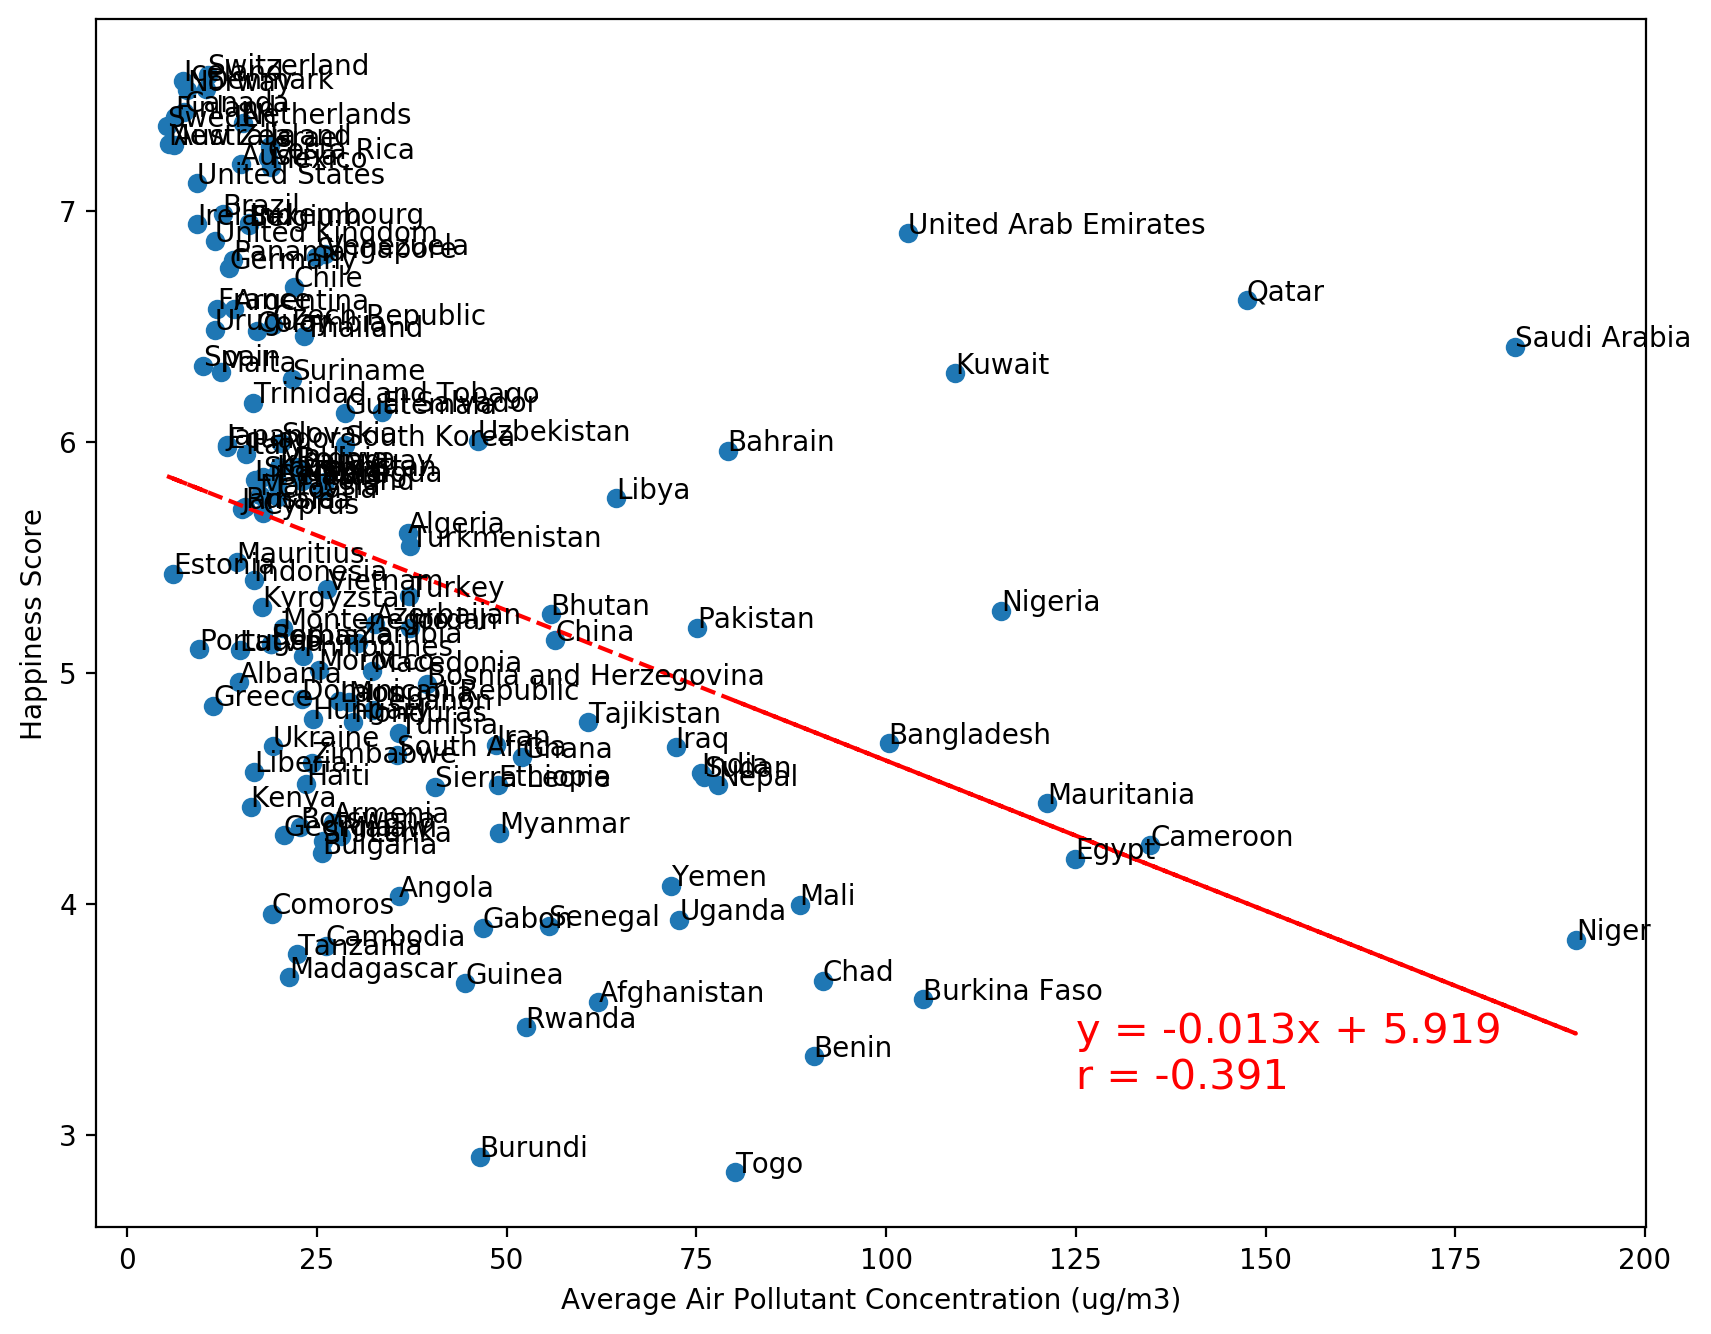

In [11]:
plt.figure(figsize = (10, 8), dpi = 200)
plt.scatter(air_contam_happiness_scores_df['2015 Mean PM2.5 (ug/m3)'], air_contam_happiness_scores_df['2015 Happiness Score'])
x_axis = air_contam_happiness_scores_df['2015 Mean PM2.5 (ug/m3)']
y_axis = air_contam_happiness_scores_df['2015 Happiness Score']
slope, y_int, r, pval, stderr = linregress(x_axis, y_axis)
regress_fit = slope * x_axis + y_int
plt.plot(x_axis, regress_fit, '--', color = 'red')
line_eq = 'y = ' + str(round(slope, 3)) + 'x + ' + str(round(y_int, 3))
plt.annotate(line_eq, (125, 3.4), fontsize=15,color="red")
plt.annotate(f'r = {r:.3f}', (125, 3.2), fontsize=15,color="red")
plt.xlabel("Average Air Pollutant Concentration (ug/m3)")
plt.ylabel("Happiness Score")

# print(pearsonr(x_axis, y_axis))
for index, row in air_contam_happiness_scores_df.iterrows():
    plt.annotate(index, (row['2015 Mean PM2.5 (ug/m3)'], row['2015 Happiness Score']))
    
plt.savefig("test.png")
plt.show()


